# In this notebook I wrote some popular algorithms and graphs for machine learning, 
for an example I took a dataset with irises

### Most of these books share the following steps (checklist):

1) Define the Problem(Look at the big picture)
2) Specify Inputs & Outputs
3) Data Collection
4) Exploratory data analysis
5) Data Preprocessing
6) Model Design, Training, and Offline Evaluation
7) Model Deployment, Online Evaluation, and Monitoring
8) Model Maintenance, Diagnosis, and Retraining

![SNOWFALL](img\image1.png)

# Problem Definition

![SNOWFALL](img\image2.png) 

## Problem Feature

### we will use the classic Iris data set. This dataset contains information about three different types of Iris flowers:

1) Iris Versicolor
2) Iris Virginica
3) Iris Setosa
### The data set contains measurements of four variables :

1) sepal length
2) sepal width
3) petal length
4) petal width
### The Iris data set has a number of interesting features:

1) One of the classes (Iris Setosa) is linearly separable from the other two. However, the other two classes are not linearly separable.

2) There is some overlap between the Versicolor and Virginica classes, so it is unlikely to achieve a perfect classification rate.

3) There is some redundancy in the four input variables, so it is possible to achieve a good solution with only three of them, or even (with difficulty) from two, but the precise choice of best variables is not obvious.

## Aim
The aim is to classify iris flowers among three species (setosa, versicolor or virginica) from measurements of length and width of sepals and petals

## Variables
The variables are : sepal_length: Sepal length, in centimeters, used as input. sepal_width: Sepal width, in centimeters, used as input. petal_length: Petal length, in centimeters, used as input. petal_width: Petal width, in centimeters, used as input. setosa: Iris setosa, true or false, used as target. versicolour: Iris versicolour, true or false, used as target. virginica: Iris virginica, true or false, used as target.

# Inputs & Outputs

## Inputs
Iris is a very popular classification and clustering problem in machine learning and it is such as "Hello world" program when you start learning a new programming language. then I decided to apply Iris on 20 machine learning method on it. As a result, iris dataset is used as the input of all algorithms.

## Outputs
the outputs for our algorithms totally depend on the type of classification or clustering algorithms. the outputs can be the number of clusters or predict for new input.

setosa: Iris setosa, true or false, used as target. versicolour: Iris versicolour, true or false, used as target. virginica: Iris virginica, true or false, used as a target.

# Loading Packages

In [379]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas import get_dummies
import plotly.graph_objs as go
from sklearn import datasets
import chart_studio.plotly as py
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

## Setup

In [380]:
warnings.filterwarnings('ignore')
sns.set_style('white')
np.random.seed(1337)
#show plot inline
%matplotlib inline

## Exploratory Data Analysis(EDA)

![SNOWFALL](img\image3.png) 

## Data Collection

Iris dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width

In [381]:
df = pd.read_csv('./data/Main_data.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Visualization

With interactive visualization, you can take the concept a step further by using technology to drill down into charts and graphs for more detail, interactively changing what data you see and how it’s processed

![SNOWFALL](img\image4.png) 

### Scatter plot
Scatter plot Purpose To identify the type of relationship (if any) between two quantitative variables

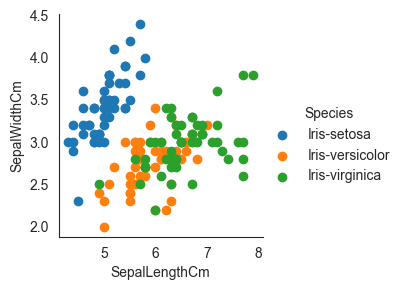

In [382]:
sns.FacetGrid(df, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

### Box
In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

<Figure size 640x480 with 0 Axes>

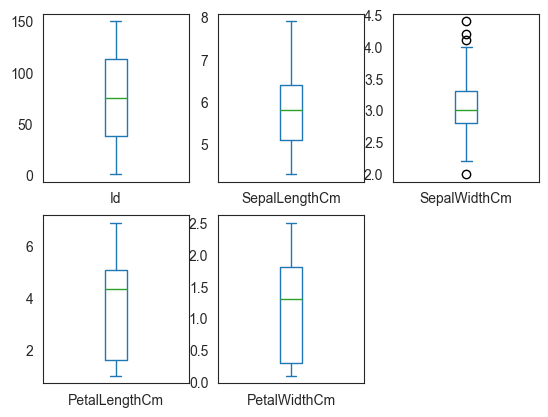

<Figure size 640x480 with 0 Axes>

In [383]:
df.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.figure()
#This gives us a much clearer idea of the distribution of the input attributes:

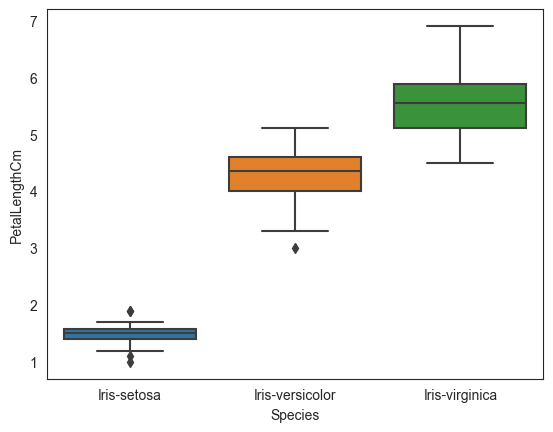

In [384]:
# To plot the species data using a box plot:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)
plt.show()

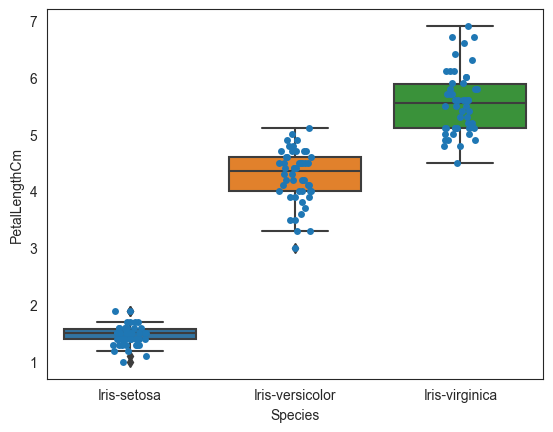

In [385]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 
ax= sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")
plt.show()

### Histogram
We can also create a histogram of each input variable to get an idea of the distribution.

<Figure size 640x480 with 0 Axes>

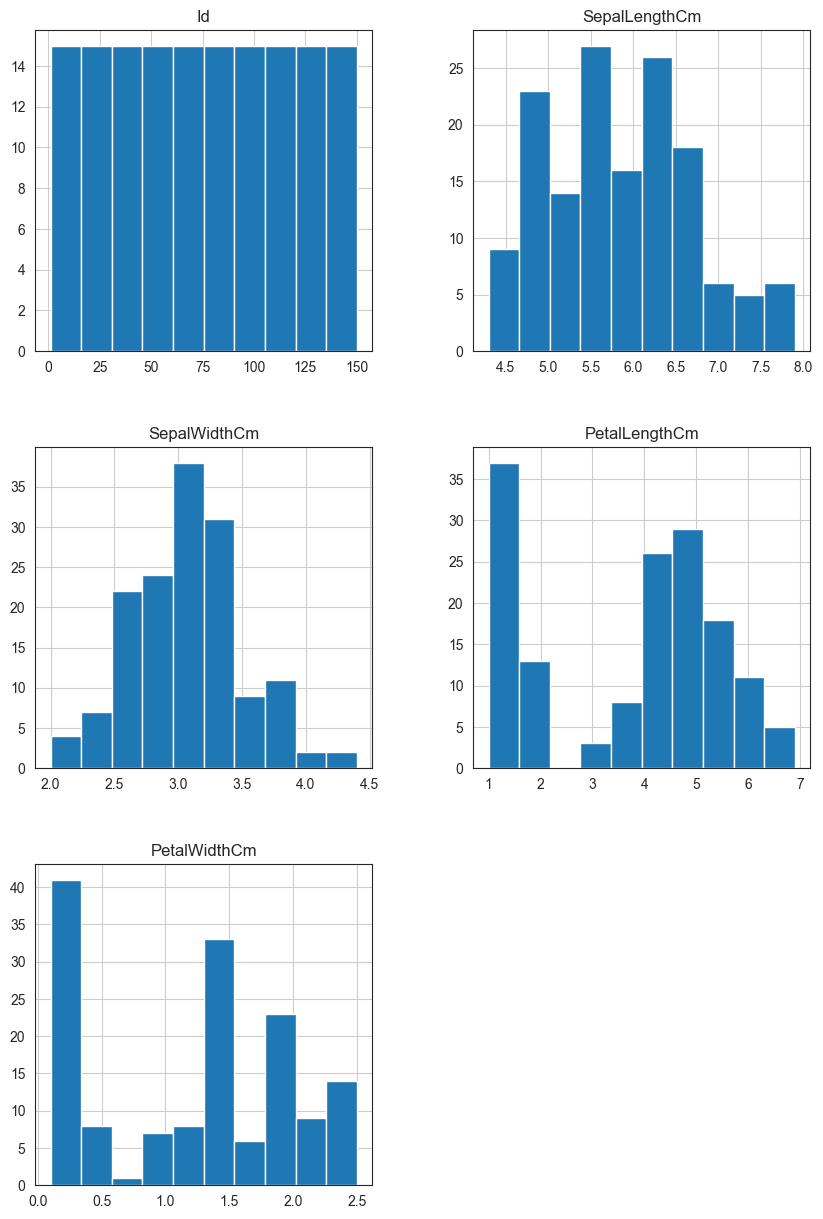

<Figure size 640x480 with 0 Axes>

In [386]:
# histograms
df.hist(figsize=(10,15))
plt.figure()

<Axes: >

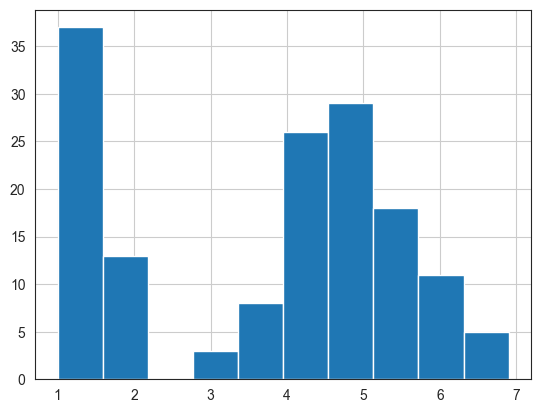

In [387]:
df["PetalLengthCm"].hist()

### Multivariate Plots
Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

<Figure size 640x480 with 0 Axes>

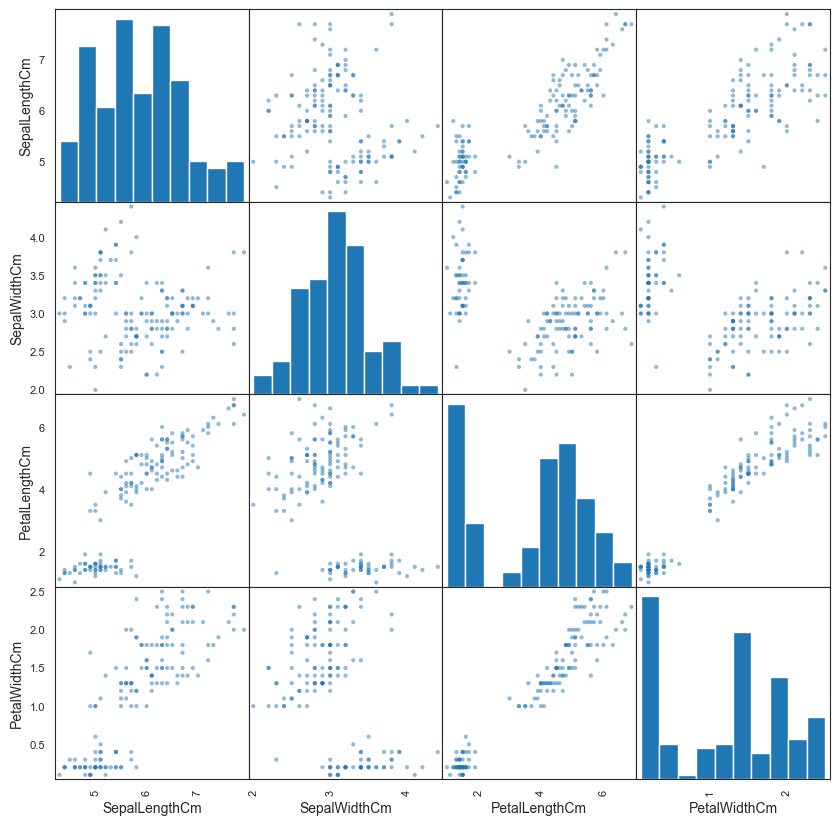

<Figure size 640x480 with 0 Axes>

In [388]:
# scatter plot matrix
pd.plotting.scatter_matrix(df.drop(columns=["Id"], axis=1),figsize=(10,10))
plt.figure()

### violinplots

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

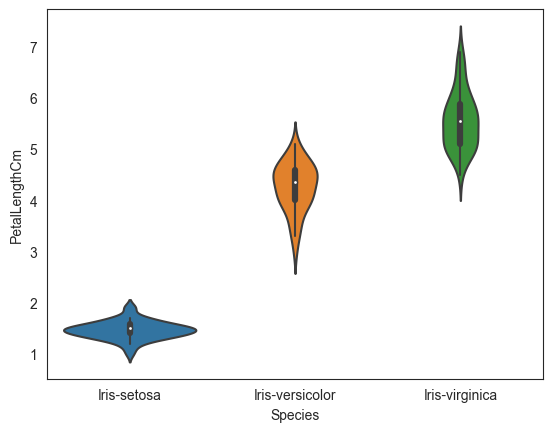

In [389]:
# violinplots on petal-length for each species
sns.violinplot(data=df,x="Species", y="PetalLengthCm")

### pairplot

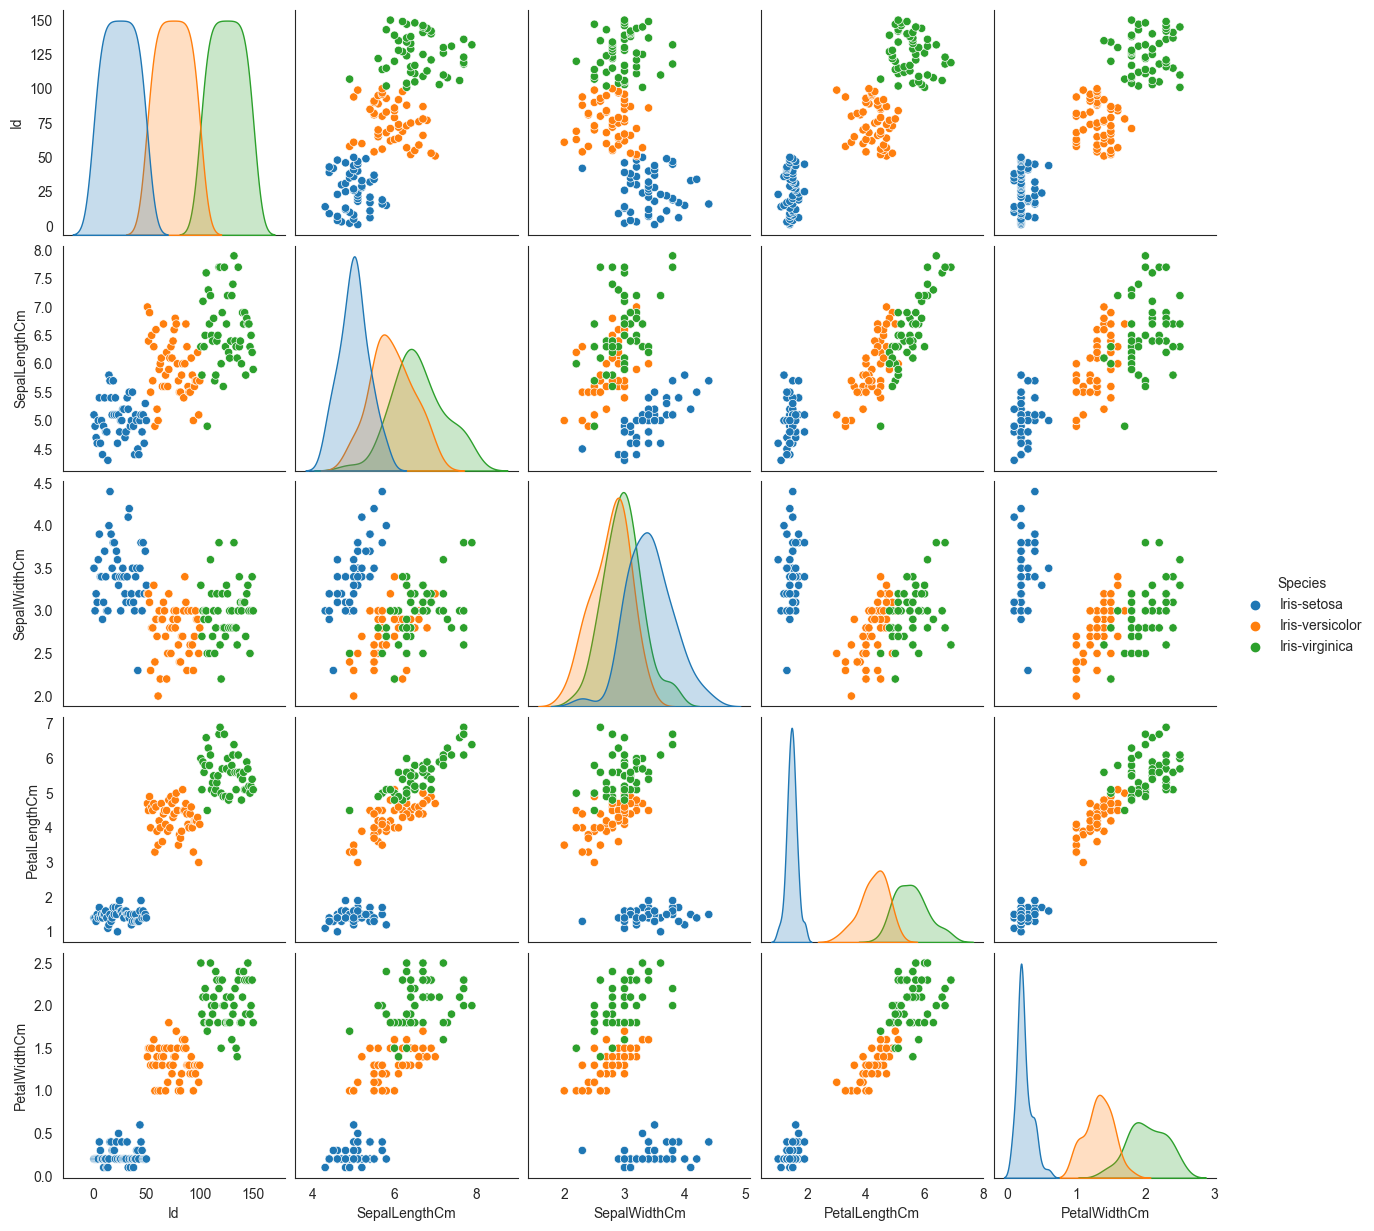

In [390]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(df, hue="Species")

### kdeplot

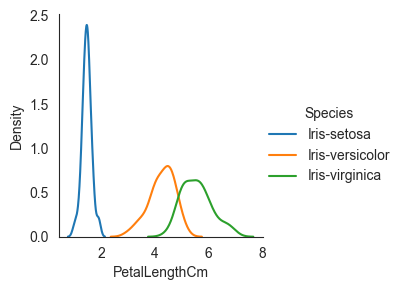

In [391]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(df, hue="Species").map(sns.kdeplot, "PetalLengthCm").add_legend()
plt.show()

### jointplot

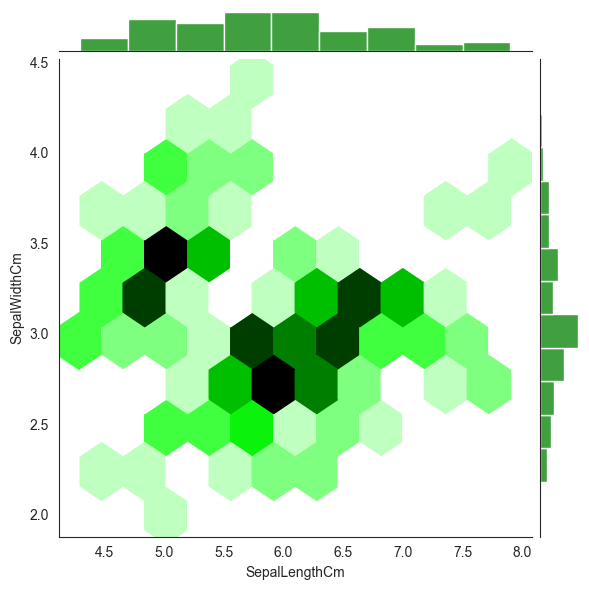

In [392]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df,ratio=10, kind='hex',color='green')
plt.show()

### radviz

<Axes: >

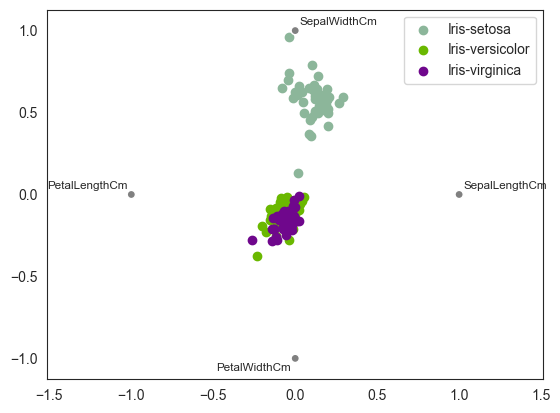

In [393]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(df.drop("Id", axis=1), "Species")

### Bar Plot

<Axes: xlabel='Species'>

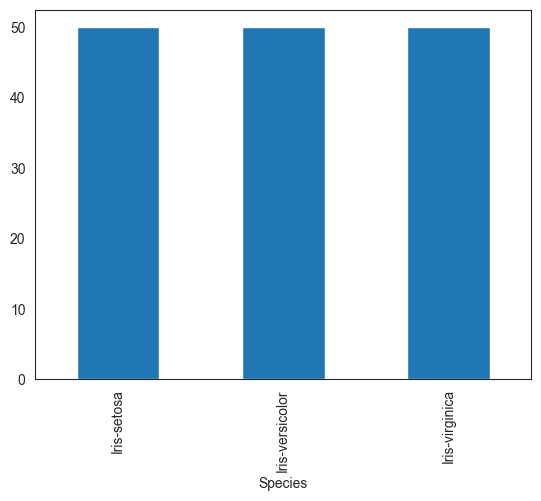

In [394]:
df['Species'].value_counts().plot(kind="bar")

### Visualization with Plotly

In [395]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly import tools
import plotly.figure_factory as ff
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
trace = go.Scatter(x=X[:, 0],
                   y=X[:, 1],
                   mode='markers',
                   marker=dict(color=np.random.randn(150),
                               size=10,
                               colorscale='Viridis',
                               showscale=False))

layout = go.Layout(title='Training Points',
                   xaxis=dict(title='Sepal length',
                            showgrid=False),
                   yaxis=dict(title='Sepal width',
                            showgrid=False),
                  )
 
fig = go.Figure(data=[trace], layout=layout)

In [396]:
py.iplot(fig)

# Data Preprocessing

Data preprocessing refers to the transformations applied to our data before feeding it to the algorithm.

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis. there are plenty of steps for data preprocessing and we just listed some of them :

1) removing Target column (id)
1) Sampling (without replacement)
1) Making part of iris unbalanced and balancing (with undersampling and SMOTE)
1) Introducing missing values and treating them (replacing by average values)
1) Noise filtering
1) Data discretization
1) Normalization and standardization
1) PCA analysis
1) Feature selection (filter, embedded, wrapper)

## Features
1) numeric
1) categorical
1) ordinal
1) datetime
1) coordinates

##  Explorer Dataset
1) Dimensions of the dataset.

1) Peek at the data itself.

1) Statistical summary of all attributes.

1) Breakdown of the data by the class variable.

In [397]:
# shape
print(df.shape)

(150, 6)


In [398]:
#columns*rows
df.size

900

In [399]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [400]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [401]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [402]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [403]:
df.head(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [404]:
# To check out last 5 row of the data set, we use tail() function
df.tail() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [405]:
# To pop up 5 random rows from the data set, we can use sample(5) function
df.sample(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,107,4.9,2.5,4.5,1.7,Iris-virginica
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
26,27,5.0,3.4,1.6,0.4,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [406]:
df.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Cleaning

In [407]:
cols = df.columns
features = cols[1:5]  # excludes col species
labels = cols[4]
print(features)
print(labels)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
PetalWidthCm


In [408]:
#Well conditioned data will have zero mean and equal variance
#We get this automattically when we calculate the Z Scores for the data

df_norm = pd.DataFrame(df)

from scipy.stats import zscore
df = df.drop(columns=["Id", "Species"]).apply(zscore)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df_norm['Species']

#Show that should now have zero mean
print("Averages")
print(df.mean())

print("\n Deviations")
#Show that we have equal variance
print(pow(df.std(),2))

Averages
SepalLengthCm   -4.736952e-16
SepalWidthCm    -6.631732e-16
PetalLengthCm    3.315866e-16
PetalWidthCm    -2.842171e-16
dtype: float64

 Deviations
SepalLengthCm    1.006711
SepalWidthCm     1.006711
PetalLengthCm    1.006711
PetalWidthCm     1.006711
dtype: float64


In [409]:
#Shuffle The data
indices = df_norm.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)

In [410]:
# One Hot Encode as a dataframe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

# Generate Training and Validation Sets. Spliting the df into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [411]:
#Check to make sure split still has 4 features and 3 labels
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


# Model Deployment

## Families of ML algorithms

There are several categories for machine learning algorithms, below are some of these categories:

1) Linear
    1) Linear Regression
    1) Logistic Regression
    1) Support Vector Machines
1) Tree-Based
    1) Decision Tree
    1) Random Forest
    1) GBDT
1) KNN
1) Neural Networks

And if we want to categorize ML algorithms with the type of learning, there are below type:

1) Classification
    1) k-Nearest Neighbors
    1) LinearRegression
    1) SVM
    1) DT
    1) NN

1) clustering
    1) K-means
    1) HCA
    1) Expectation Maximization

1) Visualization and dimensionality reduction:
    1) Principal Component Analysis(PCA)
    1) Kernel PCA
    1) Locally -Linear Embedding (LLE)
    1) t-distributed Stochastic Neighbor Embedding (t-SNE)

1) Associa tion rule learning
    1) Apriori
    1) Eclat

1) Semisupervised learning
1) Reinforcement Learning
    1) Q-learning
    
1) Batch learning & Online learning
1) Ensemble Learning

## Accuracy and precision

1) precision :
    1) In pattern recognition, information retrieval and binary classification, precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances,

1) recall :
    1) recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances.

1) F-score :
    1) the F1 score is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
1) What is the difference between accuracy and precision?
    1) "Accuracy" and "precision" are general terms throughout science. A good way to internalize the difference are the common "bullseye diagrams". In machine learning/statistics as a whole, accuracy vs. precision is analogous to bias vs. variance.

## K-Nearest Neighbours

In Machine Learning, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors. k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.

In [412]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


In [413]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model = RadiusNeighborsClassifier(radius=8.0)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

#summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accouracy score
print('accuracy is ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30

[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]
accuracy is  0.3


## Logistic Regression
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis.

In statistics, the logistic model (or logit model) is a widely used statistical model that, in its basic form, uses a logistic function to model a binary dependent variable; many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model; it is a form of binomial regression. Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail, win/lose, alive/dead or healthy/sick; these are represented by an indicator variable, where the two values are labeled "0" and "1"

In [414]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression(random_state = 42, max_iter = 1000)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


## Passive Aggressive Classifier

In [415]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


## Naive Bayes
In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

In [416]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


## BernoulliNB
Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

In [419]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.44      0.62         9
           2       0.69      1.00      0.81        11

    accuracy                           0.83        30
   macro avg       0.90      0.81      0.81        30
weighted avg       0.89      0.83      0.82        30

[[10  0  0]
 [ 0  4  5]
 [ 0  0 11]]
accuracy is 0.8333333333333334


## SVM
The advantages of support vector machines are:

1) Effective in high dimensional spaces.
1) Still effective in cases where number of dimensions is greater than the number of samples.
1) Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
1) Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

1) If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
1) SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

In [420]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


## Nu-Support Vector Classification
Similar to SVC but uses a parameter to control the number of support vectors.

In [421]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

Model = NuSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


## Linear Support Vector Classification
Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [422]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


## Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [423]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


## ExtraTreeClassifier
An extremely randomized tree classifier.

Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen. When max_features is set 1, this amounts to building a totally random decision tree.

Warning: Extra-trees should only be used within ensemble methods.

In [424]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


## Neural network¶
I have used multi-layer Perceptron classifier. This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

In [429]:
from sklearn.neural_network import MLPClassifier
Model=MLPClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is  1.0


## RandomForest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [430]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is  1.0


## Bagging classifier
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting . If samples are drawn with replacement, then the method is known as Bagging . When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces . Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches

In [431]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is  1.0


## AdaBoost classifier
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. This class implements the algorithm known as AdaBoost-SAMME .

In [432]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is  1.0


## Gradient Boosting Classifier¶
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [433]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is  1.0


## Linear Discriminant Analysis
Linear Discriminant Analysis (discriminant_analysis.LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis (discriminant_analysis.QuadraticDiscriminantAnalysis) are two classic classifiers, with, as their names suggest, a linear and a quadratic decision surface, respectively.

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no hyperparameters to tune.

In [434]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is  1.0


## Quadratic Discriminant Analysis
A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class.

In [435]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
accuracy is  0.9666666666666667


## Kmeans
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups).

The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

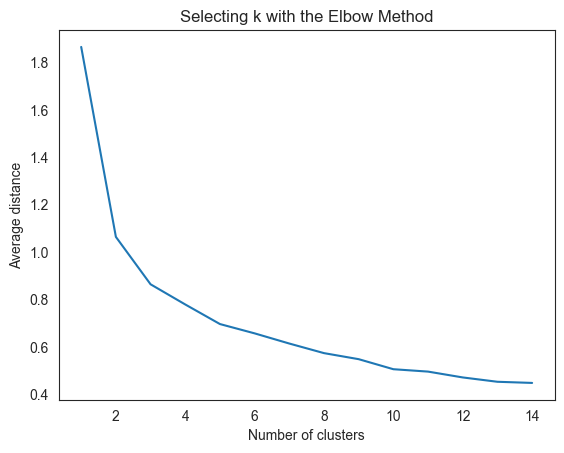

In [437]:
from sklearn.cluster import KMeans
iris_SP = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
# k-means cluster analysis for 1-15 clusters                                              
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(iris_SP)
    clusassign=model.predict(iris_SP)
    meandist.append(sum(np.min(cdist(iris_SP, model.cluster_centers_, 'euclidean'), axis=1))
    / iris_SP.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear

## Backpropagation
Backpropagation is a method used in artificial neural networks to calculate a gradient that is needed in the calculation of the weights to be used in the network.It is commonly used to train deep neural networks,a term referring to neural networks with more than one hidden layer.

In this example we will use a very simple network to start with. The network will only have one input and one output layer. We want to make the following predictions from the input:

We will use the Sigmoid activation function:

In [438]:
def sigmoid(z):
    """The sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

We could use the ReLU activation function instead:

In [439]:
def relu(z):
    """The ReLU activation function."""
    return max(0, z)

# To be continued